In [ ]:
#!pip install fbprophet

In [1]:
import pandas as pd
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pandas as pd

In [2]:
from flask import Flask, request, render_template, jsonify
from config import remote_db_endpoint, remote_db_port, remote_db_user, remote_db_pwd, remote_db_name
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [3]:
import pymysql
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import create_engine

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from config import api_key
import requests
import json

## Read Data: SP500

In [5]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")

In [6]:
pymysql.install_as_MySQLdb()
engine = create_engine(f"mysql://{remote_db_user}:{remote_db_pwd}@{remote_db_endpoint}:{remote_db_port}/{remote_db_name}")
conn = engine.connect()

In [7]:
query = '''
select * from NASDAQ
'''

data = pd.read_sql(query, conn)
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2000-01-03,4186,4192,3990,4131,4131,1510070000
1,2000-01-04,4020,4073,3898,3902,3902,1511840000
2,2000-01-05,3854,3924,3735,3878,3878,1735670000
3,2000-01-06,3834,3869,3716,3727,3727,1598320000
4,2000-01-07,3711,3883,3711,3883,3883,1634930000


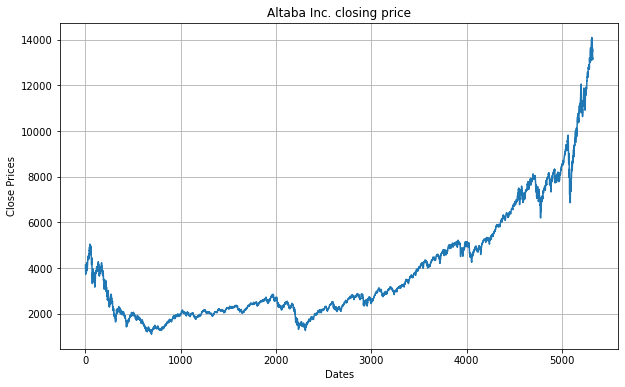

In [8]:
#plot close price
plt.figure(figsize=(10,6))
plt.grid(True)
plt.xlabel('Dates')
plt.ylabel('Close Prices')
plt.plot(data['Close'])
plt.title('Altaba Inc. closing price')
plt.show()

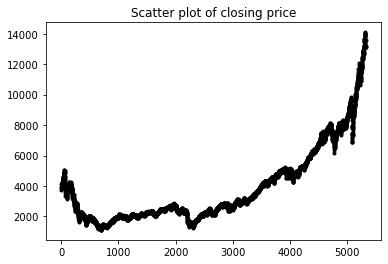

In [9]:
df_close = data['Close']
df_close.plot(style='k.')
plt.title('Scatter plot of closing price')
plt.show()

## build the predictive model

In [10]:
data = data[['Date', 'Close']]

data = data.rename(columns = {"Date":"ds","Close":"y"})
data.head()

,ds,y
0,2000-01-03,4131
1,2000-01-04,3902
2,2000-01-05,3878
3,2000-01-06,3727
4,2000-01-07,3883


In [12]:
from fbprophet import Prophet

In [13]:
m = Prophet(daily_seasonality = True) # the Prophet class (model)
m.fit(data)

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


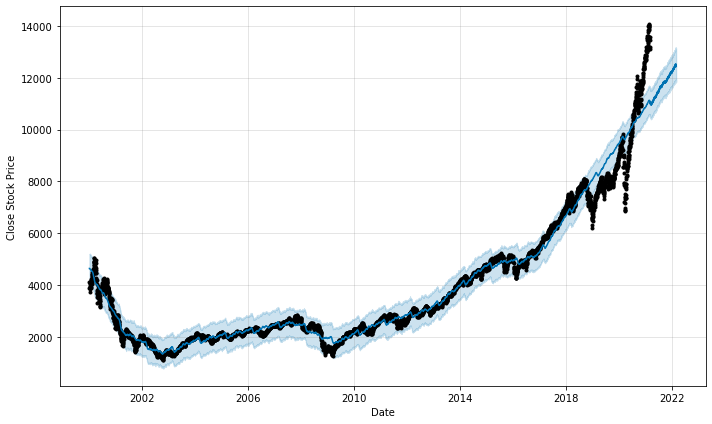

In [16]:
future = m.make_future_dataframe(periods=365) #we need to specify the number of days in future
prediction = m.predict(future)

figure = m.plot(prediction)
#plt.title("Prediction of the NASDAQ Price using the Prophet")
plt.xlabel("Date")
plt.ylabel("Close Stock Price")
plt.show()
figure.savefig(f'../plots/nasdaq_figure1.png')

In [ ]:
m.plot_components(prediction)
plt.show()